In [1]:
import pandas as pd
import numpy as np
import dropbox
import os
import matplotlib.pyplot as plt
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [4]:
# class Point():
#     def __init__(self, x, y):
#         self.x = x
#         self.y = y

#     def __repr__(self):
#         return 'Point({0},{1})'.format(self.x,self.y)

#     def translate(self, dx, dy):
#         "Add dx and dy to the point."
#         self.x += dx
#         self.y += dy

# e = Point(1.5, 2.5)

In [2]:
dbx = dropbox.Dropbox(os.environ['DROPBOX_API'])
dbx.users_get_current_account()

FullAccount(account_id='dbid:AABT1H-NJgK-ns_10QubSjssbwKMHtznqDU', name=Name(given_name='saurav', surname='chowdhury', familiar_name='saurav', display_name='saurav chowdhury', abbreviated_name='SC'), email='saurav13iitr@gmail.com', email_verified=True, disabled=False, locale='en', referral_link='https://www.dropbox.com/referrals/AADGzvUD1naruTWe92WGn9EaGcI-C2M2Zfg?src=app9-7501328', is_paired=False, account_type=AccountType('basic', None), root_info=UserRootInfo(root_namespace_id='884484377', home_namespace_id='884484377'), profile_photo_url=None, country='IN', team=None, team_member_id=None)

In [3]:
years = list(range(2002, 2020))
final_df = pd.DataFrame()

for year in years:
    path= "/Saurav/data/Stage_Specific_Ranking_-_Table_data"
    _, res = dbx.files_download(path+str(year)+".csv")
    df=pd.read_csv(res.raw)
    final_df = pd.concat([df,final_df])

final_df.shape

(21726, 114)

In [4]:
len(final_df['Athlete/Comp'].unique()) ## Unique ID for athele => Data at Athlete X Country X Competetion X Round lvl

21726

In [59]:
filtered_data = final_df.loc[:, ['Athlete/Comp','Metric', 'Score','Finish','Gender','Temp - Air','Judge 1 Score','Judge 2 Score',
                          'Judge 3 Score','Judge 4 Score','Judge 5 Score','Judge 6 Score - 1','Judge 7 Score - 1',
                          'Major Finalist','Major Medalist','Nation','Olympic Finalist','Olympic Medalist','Temp - Snow',
                          'Season','Season/Comp','Round','Wind']]

filtered_data['age_yrs'] = 2020 - final_df['yob']
filtered_data['Athlete_name'] =  final_df['Athlete/Comp'].str.extract(r"(.*-....).-", expand=False)

filtered_data = filtered_data.reset_index(drop = True)

In [60]:
(filtered_data['age_yrs'] < 0).any() == True

False

In [61]:
filtered_data.columns = filtered_data.columns.str.replace("/","_").str.replace("\ -\ ","_").str.replace("\ ","_")

In [62]:
filtered_data.columns

Index(['Athlete_Comp', 'Metric', 'Score', 'Finish', 'Gender', 'Temp_Air',
       'Judge_1_Score', 'Judge_2_Score', 'Judge_3_Score', 'Judge_4_Score',
       'Judge_5_Score', 'Judge_6_Score_1', 'Judge_7_Score_1', 'Major_Finalist',
       'Major_Medalist', 'Nation', 'Olympic_Finalist', 'Olympic_Medalist',
       'Temp_Snow', 'Season', 'Season_Comp', 'Round', 'Wind', 'age_yrs',
       'Athlete_name'],
      dtype='object')

In [63]:
filtered_data[filtered_data['Metric'] != filtered_data['Score']].loc[:, 'Season'].unique()

array([2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004,
       2003, 2002], dtype=int64)

In [64]:
filtered_data[filtered_data['Season'] == 2010].head()

,Athlete_Comp,Metric,Score,Finish,Gender,Temp_Air,Judge_1_Score,Judge_2_Score,Judge_3_Score,Judge_4_Score,...,Nation,Olympic_Finalist,Olympic_Medalist,Temp_Snow,Season,Season_Comp,Round,Wind,age_yrs,Athlete_name
13699,SMYSHLIAEV Aleksandr - OAR - World Cup 5 - 201...,52.48,15.83,15,Men,-2.0,2.5,2.5,1.1,2.7,...,OAR,1,1,-1.0,2010,2010-World Cup 5,Final 1,NaN,33.0,SMYSHLIAEV Aleksandr - OAR
13700,WILSON Bryon - USA - World Cup 7 - 2010 - Final 1,82.67,24.30,8,Men,-3.0,4.3,4.6,4.5,4.5,...,USA,1,1,-5.0,2010,2010-World Cup 7,Final 1,0.0,32.0,WILSON Bryon - USA
13701,DUFOUR LAPOINTE Justine - CAN - North American...,70.56,20.66,6,Women,NaN,3.6,4.0,3.9,4.0,...,CAN,1,1,NaN,2010,2010-North American Cup 2,Qualification 1,NaN,26.0,DUFOUR LAPOINTE Justine - CAN
13702,SALONEN Janne - FIN - World Cup 2 - 2010 - Qua...,70.56,20.76,39,Men,-3.0,3.8,3.9,3.6,3.7,...,FIN,0,0,-4.0,2010,2010-World Cup 2,Qualification,4.0,32.0,SALONEN Janne - FIN
13703,KEATING Nicholas - USA - North American Cup 2 ...,70.56,20.96,19,Men,NaN,3.6,3.6,3.7,3.7,...,USA,0,0,NaN,2010,2010-North American Cup 2,Qualification 1,NaN,28.0,KEATING Nicholas - USA


In [65]:
#Updating old scores in same scale as new metric

filtered_data['Metric'] = [round(filtered_data.loc[i,'Score']/30*100, 2) if filtered_data.loc[i, 'Metric'] != filtered_data.loc[i,'Score'] \
        else filtered_data.loc[i, 'Metric'] for i in range(len(filtered_data))]

filtered_data[filtered_data['Season'] == 2010].head()

,Athlete_Comp,Metric,Score,Finish,Gender,Temp_Air,Judge_1_Score,Judge_2_Score,Judge_3_Score,Judge_4_Score,...,Nation,Olympic_Finalist,Olympic_Medalist,Temp_Snow,Season,Season_Comp,Round,Wind,age_yrs,Athlete_name
13699,SMYSHLIAEV Aleksandr - OAR - World Cup 5 - 201...,52.77,15.83,15,Men,-2.0,2.5,2.5,1.1,2.7,...,OAR,1,1,-1.0,2010,2010-World Cup 5,Final 1,NaN,33.0,SMYSHLIAEV Aleksandr - OAR
13700,WILSON Bryon - USA - World Cup 7 - 2010 - Final 1,81.00,24.30,8,Men,-3.0,4.3,4.6,4.5,4.5,...,USA,1,1,-5.0,2010,2010-World Cup 7,Final 1,0.0,32.0,WILSON Bryon - USA
13701,DUFOUR LAPOINTE Justine - CAN - North American...,68.87,20.66,6,Women,NaN,3.6,4.0,3.9,4.0,...,CAN,1,1,NaN,2010,2010-North American Cup 2,Qualification 1,NaN,26.0,DUFOUR LAPOINTE Justine - CAN
13702,SALONEN Janne - FIN - World Cup 2 - 2010 - Qua...,69.20,20.76,39,Men,-3.0,3.8,3.9,3.6,3.7,...,FIN,0,0,-4.0,2010,2010-World Cup 2,Qualification,4.0,32.0,SALONEN Janne - FIN
13703,KEATING Nicholas - USA - North American Cup 2 ...,69.87,20.96,19,Men,NaN,3.6,3.6,3.7,3.7,...,USA,0,0,NaN,2010,2010-North American Cup 2,Qualification 1,NaN,28.0,KEATING Nicholas - USA


In [66]:
# Dropping the scores column
filtered_data = filtered_data.drop(columns = ['Score'])

#filtering the finals only
filtered_data = filtered_data[filtered_data['Round'].str.lower().str.extract(r'.*(final).*', expand=False).notnull()]

print(filtered_data.shape)
#dividing competition data into 3 levels
tier1_df = filtered_data[filtered_data['Season_Comp'].str.lower().str.extract(r'.*(world).*', expand=False).notnull() |\
                 filtered_data['Season_Comp'].str.lower().str.extract(r'.*(olympics).*', expand=False).notnull()]

print(tier1_df.shape)

tier2_df = filtered_data[filtered_data['Season_Comp'].str.lower().str.extract(r'.*(north american).*', expand=False).notnull()]
print(tier2_df.shape)

tier3_df = filtered_data[filtered_data['Season_Comp'].str.lower().str.extract(r'.*(canad).*', expand=False).notnull()]
print(tier3_df.shape)

print(tier1_df.shape[0]+tier2_df.shape[0]+tier3_df.shape[0])

(6430, 24)
(4765, 24)
(1494, 24)
(171, 24)
6430


In [67]:
tier1_df = tier1_df.loc[:, ['Athlete_Comp', 'Athlete_name', 'Gender', 'age_yrs', 'Nation', 'Judge_1_Score', 'Judge_2_Score', 
                    'Judge_3_Score', 'Judge_4_Score', 'Judge_5_Score', 'Judge_6_Score_1', 'Judge_7_Score_1', 'Major_Finalist',
                    'Major_Medalist', 'Olympic_Finalist', 'Olympic_Medalist','Temp_Snow', 'Temp_Air','Wind',
                    'Season', 'Season_Comp', 'Round', 'Metric', 'Finish']]

tier2_df= tier2_df.loc[:, ['Athlete_Comp', 'Athlete_name', 'Gender', 'age_yrs', 'Nation', 'Judge_1_Score', 'Judge_2_Score', 
                    'Judge_3_Score', 'Judge_4_Score', 'Judge_5_Score', 'Judge_6_Score_1', 'Judge_7_Score_1', 'Major_Finalist',
                    'Major_Medalist', 'Olympic_Finalist', 'Olympic_Medalist','Temp_Snow', 'Temp_Air','Wind',
                    'Season', 'Season_Comp', 'Round', 'Metric', 'Finish']]

tier3_df= tier3_df.loc[:, ['Athlete_Comp', 'Athlete_name', 'Gender', 'age_yrs', 'Nation', 'Judge_1_Score', 'Judge_2_Score', 
                    'Judge_3_Score', 'Judge_4_Score', 'Judge_5_Score', 'Judge_6_Score_1', 'Judge_7_Score_1', 'Major_Finalist',
                    'Major_Medalist', 'Olympic_Finalist', 'Olympic_Medalist','Temp_Snow', 'Temp_Air','Wind',
                    'Season', 'Season_Comp', 'Round', 'Metric', 'Finish']]

tier1_df = tier1_df.rename(columns = {'Athlete_Comp' : 'Athlete_Comp_ID', 'Finish' : 'Finish_Rank', 'Metric' : 'Score_Metric'})
tier2_df = tier2_df.rename(columns = {'Athlete_Comp' : 'Athlete_Comp_ID', 'Finish' : 'Finish_Rank', 'Metric' : 'Score_Metric'})
tier3_df = tier3_df.rename(columns = {'Athlete_Comp' : 'Athlete_Comp_ID', 'Finish' : 'Finish_Rank', 'Metric' : 'Score_Metric'})

In [68]:
tier3_df['Gender'].unique()

array(['Men', 'Women'], dtype=object)

In [69]:
# Dividing into men and women
tier1_df_M = tier1_df[tier1_df['Gender'] == "Men"]
tier1_df_W = tier1_df[tier1_df['Gender'] == "Women"]
tier2_df_M = tier2_df[tier2_df['Gender'] == "Men"]
tier2_df_W = tier2_df[tier2_df['Gender'] == "Women"]
tier3_df_M = tier3_df[tier3_df['Gender'] == "Men"]
tier3_df_W = tier3_df[tier3_df['Gender'] == "Women"]


In [70]:
tier1_df_M.to_csv("../data/tier_1_comp_data_men.csv", index = False)
tier2_df_M.to_csv("../data/tier_2_comp_data_men.csv", index = False)
tier3_df_M.to_csv("../data/tier_3_comp_data_men.csv", index = False)

tier1_df_W.to_csv("../data/tier_1_comp_data_women.csv", index = False)
tier2_df_W.to_csv("../data/tier_2_comp_data_women.csv", index = False)
tier3_df_W.to_csv("../data/tier_3_comp_data_women.csv", index = False)

### Data Cleaning starts..

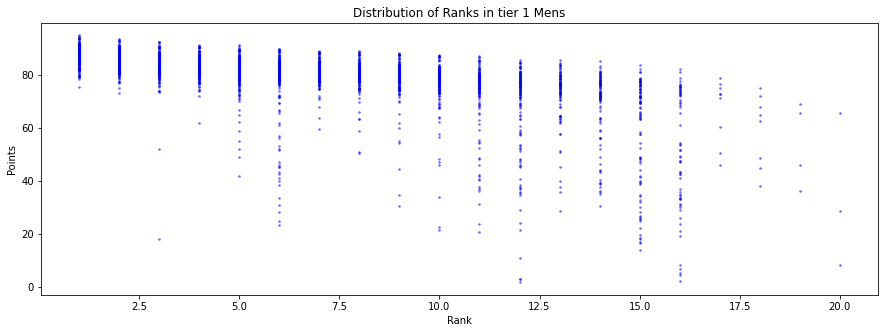

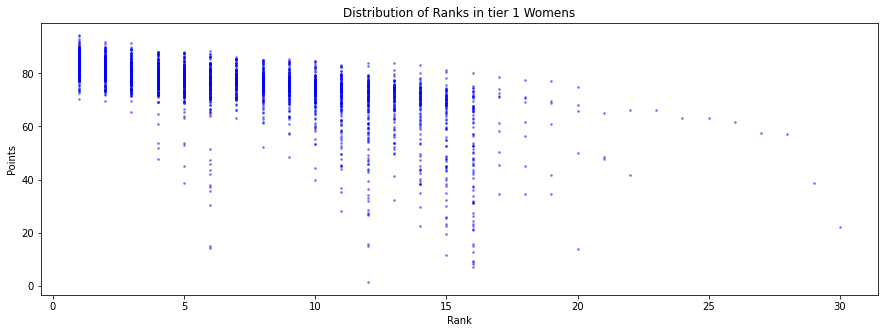

In [45]:
plt.figure(figsize = (15,5))
plt.scatter(tier1_df_M['Finish_Rank'], tier1_df_M['Score_Metric'], s =3, c = 'blue', alpha = 0.4)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in tier 1 Mens")
plt.show()

plt.figure(figsize = (15,5))
plt.scatter(tier1_df_W['Finish_Rank'], tier1_df_W['Score_Metric'], s =3, c = 'blue', alpha = 0.4)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in tier 1 Womens")
plt.show()

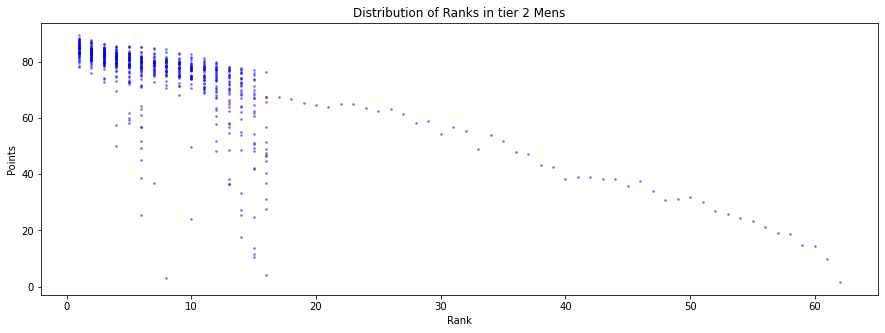

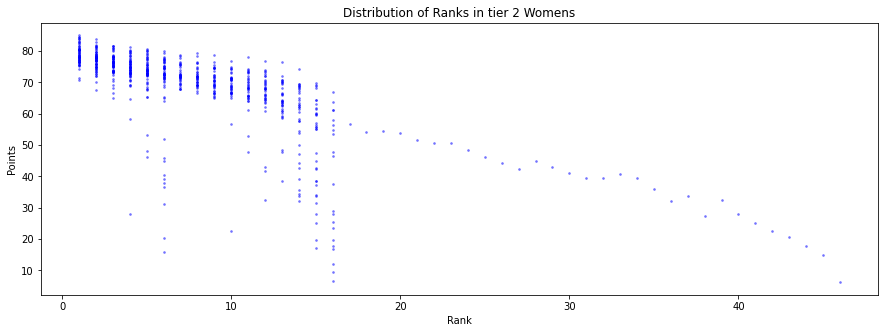

In [44]:
plt.figure(figsize = (15,5))
plt.scatter(tier2_df_M['Finish_Rank'], tier2_df_M['Score_Metric'], s =3, c = 'blue', alpha = 0.4)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in tier 2 Mens")
plt.show()

plt.figure(figsize = (15,5))
plt.scatter(tier2_df_W['Finish_Rank'], tier2_df_W['Score_Metric'], s =3, c = 'blue', alpha = 0.4)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in tier 2 Womens")
plt.show()

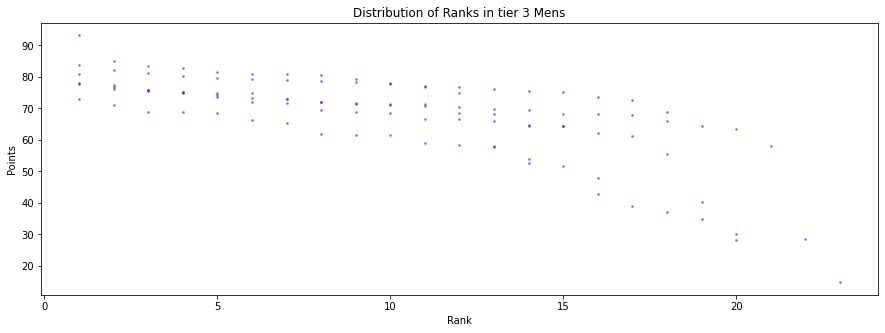

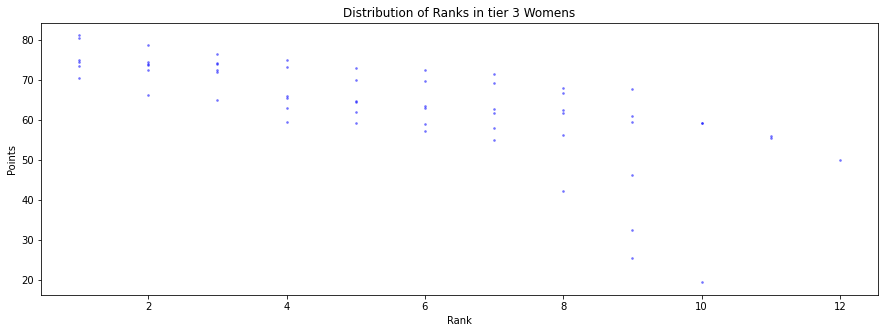

In [43]:
plt.figure(figsize = (15,5))
plt.scatter(tier3_df_M['Finish_Rank'], tier3_df_M['Score_Metric'], s =3, c = 'blue', alpha = 0.4)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in tier 3 Mens")
plt.show()

plt.figure(figsize = (15,5))
plt.scatter(tier3_df_W['Finish_Rank'], tier3_df_W['Score_Metric'], s =3, c = 'blue', alpha = 0.4)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in tier 3 Womens")
plt.show()

In [52]:
tier1_df_M.columns

Index(['Athlete_Comp_ID', 'Athlete_name', 'Gender', 'age_yrs', 'Nation',
       'Judge_1_Score', 'Judge_2_Score', 'Judge_3_Score', 'Judge_4_Score',
       'Judge_5_Score', 'Judge_6_Score_1', 'Judge_7_Score_1', 'Major_Finalist',
       'Major_Medalist', 'Olympic_Finalist', 'Olympic_Medalist', 'Temp_Snow',
       'Temp_Air', 'Wind', 'Season', 'Season_Comp', 'Round', 'Score_Metric',
       'Finish_Rank'],
      dtype='object')

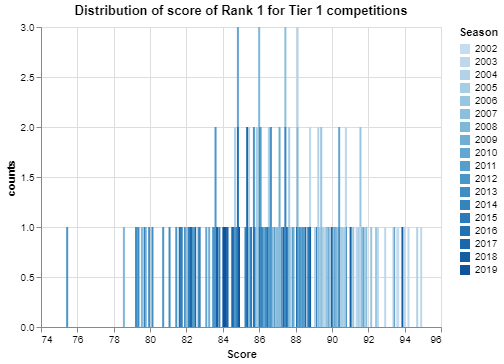

In [123]:
alt.Chart(tier1_df_M).mark_bar(size = 2).encode(
    alt.X('Score_Metric:Q', title = "Score"),
    alt.Y('count()', title = "counts"),
    alt.Color('Season:O'),
    tooltip = ['Season']
).transform_filter(
    "(datum.Finish_Rank == 1)"
).properties(title = "Distribution of score of Rank 1 for Tier 1 competitions")

In [73]:
from scipy.stats import norm
from scipy.stats import poisson

In [86]:
tier1_mean = tier1_df_M[tier1_df_M['Finish_Rank'] == 6].loc[:, 'Score_Metric'].mean()
tier1_std = tier1_df_M[tier1_df_M['Finish_Rank'] == 6].loc[:, 'Score_Metric'].std()
print(tier1_mean)
tier1_std

76.44016393442621


12.758600696440796

In [92]:
tier1_df_M[(tier1_df_M['Finish_Rank'] == 6) & (tier1_df_M['Season'] == 2016)].loc[:, 'Score_Metric']

6039    75.67
6164    80.05
6338    84.66
6363    83.00
6596    81.18
6624    79.41
6722    78.56
6842    45.98
Name: Score_Metric, dtype: float64

In [93]:
norm.cdf(tier1_df_M[(tier1_df_M['Finish_Rank'] == 6) & (tier1_df_M['Season'] == 2016)].loc[:, 'Score_Metric'],
         loc = tier1_mean,
         scale = tier1_std)

array([0.47593275, 0.61138611, 0.74029607, 0.69642648, 0.64486789,
       0.5920305 , 0.56598038, 0.0084835 ])

In [94]:
poisson.cdf(tier1_df_M[(tier1_df_M['Finish_Rank'] == 6) & (tier1_df_M['Season'] == 2016)].loc[:, 'Score_Metric'],
             mu = tier1_mean)

array([4.64690876e-01, 6.84121722e-01, 8.22543587e-01, 7.92268190e-01,
       7.22873913e-01, 6.43057872e-01, 6.00081669e-01, 6.96457256e-05])

In [100]:
tier1_df_M.loc[tier1_df_M['Season_Comp'] == '2010-World Cup 7', :].sort_values('Finish_Rank').head(3)

,Athlete_Comp_ID,Athlete_name,Gender,age_yrs,Nation,Judge_1_Score,Judge_2_Score,Judge_3_Score,Judge_4_Score,Judge_5_Score,...,Olympic_Finalist,Olympic_Medalist,Temp_Snow,Temp_Air,Wind,Season,Season_Comp,Round,Score_Metric,Finish_Rank
1520,COLAS Guilbaut - FRA - World Cup 7 - 2010 - Fi...,COLAS Guilbaut - FRA,Men,37.0,FRA,4.7,4.9,4.7,4.7,4.8,...,1,0,-5.0,-3.0,0.0,2010,2010-World Cup 7,Final 1,89.63,1
1244,BEGG SMITH Dale - AUS - World Cup 7 - 2010 - F...,BEGG SMITH Dale - AUS,Men,35.0,AUS,4.7,4.7,4.6,4.8,4.8,...,1,1,-5.0,-3.0,0.0,2010,2010-World Cup 7,Final 1,88.13,2
1360,BJOERNLUND Jesper - SWE - World Cup 7 - 2010 -...,BJOERNLUND Jesper - SWE,Men,35.0,SWE,4.6,4.8,4.7,4.7,4.7,...,1,0,-5.0,-3.0,0.0,2010,2010-World Cup 7,Final 1,86.64,3


In [106]:
tier1_df_M.loc[tier1_df_M['Season_Comp'] == '2010-World Cup 3', :].sort_values('Finish_Rank').head(3)

,Athlete_Comp_ID,Athlete_name,Gender,age_yrs,Nation,Judge_1_Score,Judge_2_Score,Judge_3_Score,Judge_4_Score,Judge_5_Score,...,Olympic_Finalist,Olympic_Medalist,Temp_Snow,Temp_Air,Wind,Season,Season_Comp,Round,Score_Metric,Finish_Rank
848,BEGG SMITH Dale - AUS - World Cup 3 - 2010 - F...,BEGG SMITH Dale - AUS,Men,35.0,AUS,4.7,4.7,4.7,4.6,4.6,...,1,1,-9.0,-10.0,5.6,2010,2010-World Cup 3,Final 1,81.95,1
588,MARQUIS Vincent - CAN - World Cup 3 - 2010 - F...,MARQUIS Vincent - CAN,Men,36.0,CAN,4.4,4.3,4.6,4.5,4.3,...,1,0,-9.0,-10.0,5.6,2010,2010-World Cup 3,Final 1,79.95,2
1577,SMYSHLIAEV Aleksandr - OAR - World Cup 3 - 201...,SMYSHLIAEV Aleksandr - OAR,Men,33.0,OAR,4.6,4.6,4.2,4.5,4.5,...,1,1,-9.0,-10.0,5.6,2010,2010-World Cup 3,Final 1,80.19,3
